<a href="https://colab.research.google.com/github/AllisonKleber/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_ipynb_(Hava%C3%AD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Havaí*

<center><img alt="Havai" width="70%" src="https://www.remessaonline.com.br/blog/wp-content/uploads/2022/06/havai-1024x683.jpg.optimal.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes o estado do Havaí, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para facilitar nossa análise foram extraidos dados resumidos (Summary information and metrics for listings in Hawaii (good for visualisations)


In [35]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# importar o arquivo listings.csv para um DataFrame
df_Havai = pd.read_csv('http://data.insideairbnb.com/united-states/hi/hawaii/2022-09-12/visualisations/listings.csv')

## Análise dos Dados

Segue abaixo a estrutura dos dados (DataFrame), assim podemos facilitar a nossa compressão e análise. 


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Ilhas do Havaí
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [37]:
# mostrar as 5 primeiras entradas
df_Havai.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,2022-07-13,0.17,3,212,10,119-269-5808-01R
1,34843927,Simply Paradise Glamping,262664392,Adriano And Julia,Hawaii,North Kona,19.66220,-155.95681,Private room,83,1,194,2022-08-25,5.90,3,334,96,NaN
2,35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,Hawaii,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,2022-02-19,0.25,1,197,2,NaN
3,35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Maui,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,2022-06-24,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
4,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,2022-09-03,1.31,3,166,19,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Baixo podermos identificar quais os tipos de variáveis de cada coluna da nossa DataFrame, e a quantidade a quantidade de entradas da mesma.

In [38]:
# identificar o volume de dados do DataFrame
print('Entrada:\t {}'.format(df_Havai.shape[0]))
print('Variáveis:\t {}\n'.format(df_Havai.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df_Havai.dtypes)

Entrada:	 28580
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A partir desse momento precisamos identificar os valores ausentes no dataset, assim teremos uma dimensão e qualidade dos nossos dados extraídos.

Podemos observar que as colunas **reviews_per_month** e **last_review**, possui 19,38% dos seus valores faltantes.
* A coluna **license**, possui 16,46% dos valores faltantes.
* E a coluna **host_name**, possui menos que 1% dos valores faltantes.


In [39]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_Havai.isnull().sum() / df_Havai.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.193807
last_review                       0.193807
license                           0.164626
host_name                         0.004689
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Abaixo consta o histograma para identificar a distribuição das variáveis.

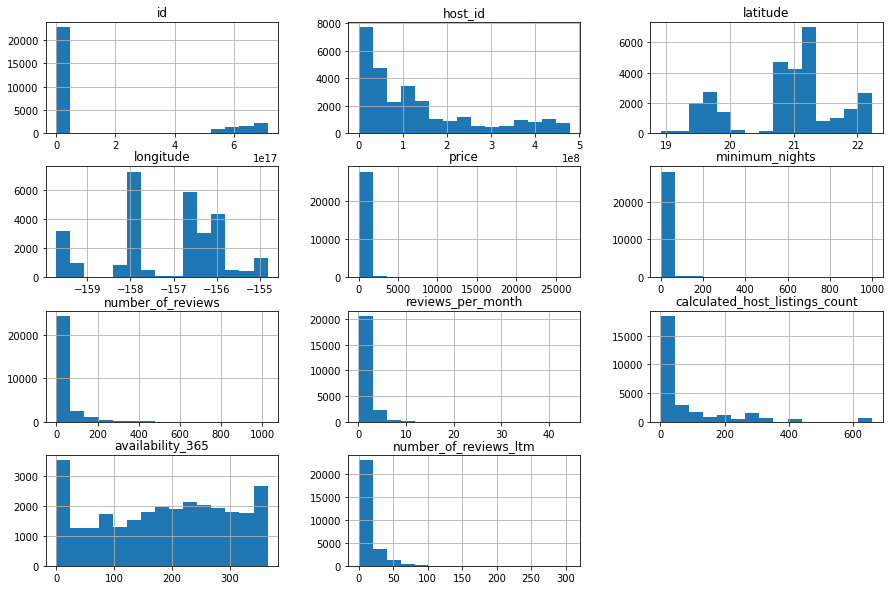

In [40]:
# plotar o histograma das variáveis numéricas
df_Havai.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

O objetivo é buscar relação entre duas variáveis, onde serão utilizados as seguintes técnicas:

* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a bliblioteca **seaborn.**

In [41]:
# criar uma matriz de correlação
corr = df_Havai[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.000501,-0.099521,-0.117144,0.111104,-0.013797
minimum_nights,-0.000501,1.000000,-0.063217,-0.127871,0.008250,-0.014110
number_of_reviews,-0.099521,-0.063217,1.000000,0.580961,-0.232025,0.011419
reviews_per_month,-0.117144,-0.127871,0.580961,1.000000,-0.268022,0.021111
calculated_host_listings_count,0.111104,0.008250,-0.232025,-0.268022,1.000000,0.140144
availability_365,-0.013797,-0.014110,0.011419,0.021111,0.140144,1.000000


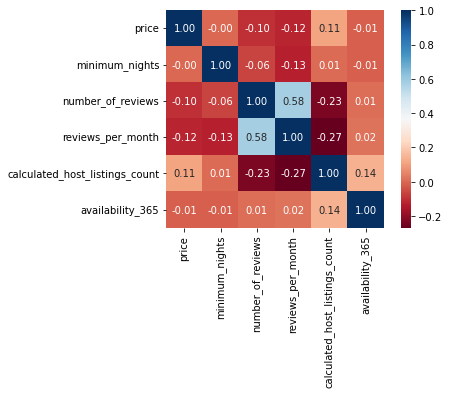

In [42]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Através da coluna **room_type**, podemos identificar os tipos de imóveis mais alugados, onde temos as seguintes legendas:


* Entire home/apt: Casa inteira/apto
* Private room: Quarto privado
* Hotel room: Quarto compartilhado
* Shared room: Quarto de hotel

Também, estaremos verificando a média de preço de cada tipo de imóveis alugado, onde podemos destacar **Private room: Quarto privado** com a média cobrada de 566,45.

In [43]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_Havai.room_type.value_counts()

Entire home/apt    25147
Private room        3324
Hotel room            73
Shared room           36
Name: room_type, dtype: int64

In [44]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_Havai.room_type.value_counts() / df_Havai.shape[0]

Entire home/apt    0.879881
Private room       0.116305
Hotel room         0.002554
Shared room        0.001260
Name: room_type, dtype: float64

In [57]:
# média de preço por tipo de imóvel
df_Havai.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Private room       566.450060
Entire home/apt    465.374399
Hotel room         256.506849
Shared room         77.194444
Name: price, dtype: float64

### **Q6. Qual a localidade mais cara do Havaí?**

ara fazer esse verificação será utilizado a função **groupby()**, assim será foi um agrupamento por bairro a partir do preço de locação. Também, utilizaremos o mesmo método para visualizar a quantidade de imóveis que estão sendo ofertados por bairro.



In [45]:
# ver preços por bairros, na média
df_Havai.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Lahaina              839.190228
Koolaupoko           626.780220
East Honolulu        608.263158
Koloa-Poipu          576.187905
South Kohala         568.078463
Kihei-Makena         511.332185
Ewa                  481.951550
Koolauloa            480.589789
North Shore Oahu     464.473810
North Shore Kauai    460.895982
Name: price, dtype: float64

In [54]:
# Quantidade de imoveis por bairro
df_Havai.neighbourhood.value_counts().sort_values(ascending=False)[:20]

Primary Urban Center    6221
Lahaina                 4421
Kihei-Makena            4064
North Kona              3011
North Shore Kauai       1817
Koloa-Poipu             1389
South Kohala            1249
Puna                    1113
Kapaa-Wailua             697
Koolauloa                568
Ewa                      516
South Hilo               513
Koolaupoko               455
North Shore Oahu         420
Lihue                    284
South Kona               267
Waianae                  241
Paia-Haiku               222
Kau                      220
East Honolulu            190
Name: neighbourhood, dtype: int64

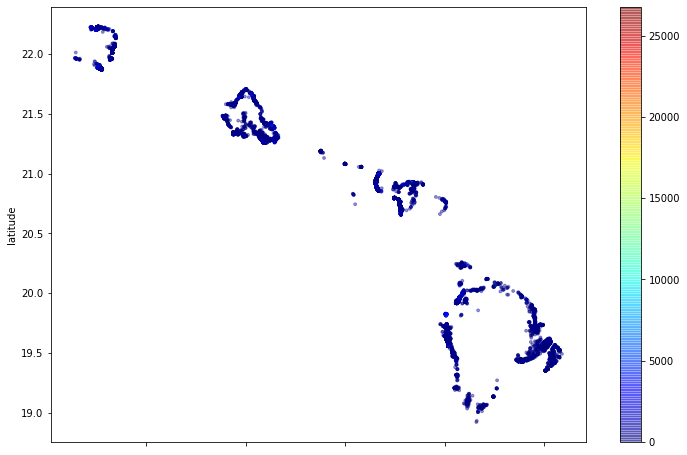

In [49]:
# plotar os imóveis pela latitude-longitude
df_Havai.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_Havai['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [53]:
# ver a média da coluna `minimum_nights`
print("Média de {} noites".format(df_Havai.minimum_nights.median()))

Média de 3.0 noites


## Conclusões


Podemos ver com essa análise que a localidade **East Honolulu** com a média de preço de 608.26, sendo 3ª maior média entre as localidades, porém, à mesma só tem 190 imóveis para alugar, assim distorcendo as informações estatísticas.
Também, podemos destacar que a média de valor do **Quarto privado (566,45)** é mais caro que o tipo **Casa inteira/apto (465,37)**, assim gerando 87% ocupação para esse tipo de imóveis.

Também, vale ressaltar que essa análise foi apenas uma análise superficial na base de dados do Airbnb.
